# Preliminaries

In [1]:
print(500000*20)

10000000


## Installing packages

In [ ]:
!pip install d2l==0.17.1

## Import packages

In [ ]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt


# Data preprocessing

## Generate dataset

In [ ]:
def synthetic_data(w, b, num_examples):  
    """
      Generate y = Xw + b + noise
      ---------------------------
        w: weight
        b: bias
        y: output
        X: input

    """
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000, 1])


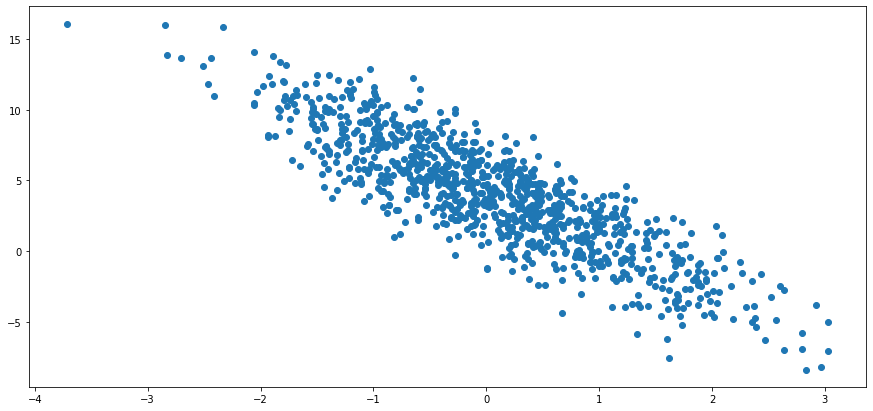

In [ ]:
# Visualization
plt.figure(figsize=(15,7))
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy())
plt.show()

## Mini-batch splitting

In [ ]:
# Random sample the data
def data_iter(batch_size, features, labels, shuffle):
    '''
      Return a mini-batch (sample) of the data through each iteration
      ================================================================
        batch_size: batch (sample) size to return
        features: input
        labels: output
        shuffle: shuffle the data 
    '''
    num_examples = len(features)
    indices = list(range(num_examples))

    # The examples are read at random, in no particular order
    if shuffle == True:
      random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
       # If num_examples < batch_size: Choose num_examples, Else: Choose batch_size
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels, True):
    print(X, '\n', y)
    break

tensor([[ 0.7930, -0.4406],
        [ 0.1559,  0.4350],
        [-0.3611,  1.3908],
        [ 1.2139, -0.5401],
        [ 1.0824,  0.1245],
        [-0.4788,  1.9851],
        [ 0.9772,  0.0814],
        [ 2.0638, -1.1300],
        [ 0.4384, -0.6596],
        [ 0.0315,  0.3116]]) 
 tensor([[ 7.2743],
        [ 3.0334],
        [-1.2635],
        [ 8.4497],
        [ 5.9235],
        [-3.5275],
        [ 5.8845],
        [12.1620],
        [ 7.3073],
        [ 3.1929]])


# Linear Regression model

## Define Linear Regression

In [ ]:
def linreg(X, w, b): 
    '''
      The linear regression model.
      ============================
        X: input
        w: weights
        b: bias
    '''
    return torch.matmul(X, w) + b

## Define Loss Function

In [ ]:
def squared_loss(y_hat, y): 
    '''Squared loss.'''
    return (y_hat - y.reshape(y_hat.shape)) ** 2 

## Mini-batch stochastic gradient descent


In [ ]:
def sgd(params, lr, batch_size):
    '''
      Minibatch stochastic gradient descent.
    '''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## Training

In [ ]:
# Randomly initiate the model parameters
w = torch.normal(0, 1, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels, True):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        l.sum().backward() # Compute gradient on `l` with respect to [`w`, `b`]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000103
epoch 2, loss 0.000102
epoch 3, loss 0.000102


## Results

In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0011, -0.0007], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0008], grad_fn=<RsubBackward1>)


In [ ]:
(torch.matmul(features,w)+b).detach().numpy().shape

(1000, 1)

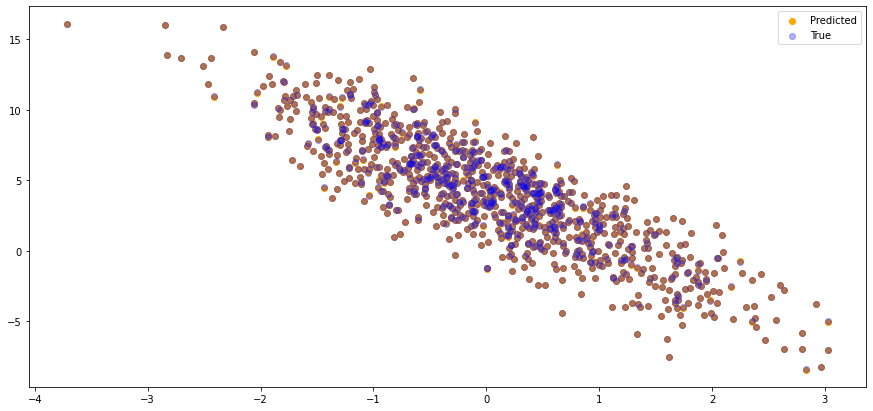

In [ ]:
# Visulization of the results
plt.figure(figsize=(15,7))
plt.scatter(features[:, 1].detach().numpy(), (torch.matmul(features,w)+b).detach().numpy(), color = 'orange', label='Predicted')
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), color = 'blue', label='True', alpha=0.3)
plt.legend()
plt.show()